In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
import matplotlib.ticker as ticker

In [2]:
api_key = '6d1a1c618eecaaf51ef66e59b8b3a6b1'
url = f"https://api.eia.gov/category/?api_key={api_key}&category_id=2889994"

r = requests.get(url)
json_data = r.json()

if r.status_code == 200:
    print('Success!')
else:
    print('Error')

Success!


In [3]:
children = json_data.get('category')['childcategories']
# for child in children:
    

In [4]:
id_range = np.arange(2889995,2890061,1).astype('int')
id_range

array([2889995, 2889996, 2889997, 2889998, 2889999, 2890000, 2890001,
       2890002, 2890003, 2890004, 2890005, 2890006, 2890007, 2890008,
       2890009, 2890010, 2890011, 2890012, 2890013, 2890014, 2890015,
       2890016, 2890017, 2890018, 2890019, 2890020, 2890021, 2890022,
       2890023, 2890024, 2890025, 2890026, 2890027, 2890028, 2890029,
       2890030, 2890031, 2890032, 2890033, 2890034, 2890035, 2890036,
       2890037, 2890038, 2890039, 2890040, 2890041, 2890042, 2890043,
       2890044, 2890045, 2890046, 2890047, 2890048, 2890049, 2890050,
       2890051, 2890052, 2890053, 2890054, 2890055, 2890056, 2890057,
       2890058, 2890059, 2890060])

In [5]:
plant_outage_series = np.zeros(len(id_range))
plant_names = []
for i, idx in enumerate(id_range):
    url = f"https://api.eia.gov/category/?api_key={api_key}&category_id={idx}"
    r = requests.get(url)
    json_data = r.json()
    
#     if r.status_code == 200:
#         print('Success!')
#     else:
#         print('Error')
    num = json_data.get('category')['childseries'][0]['series_id'].split('.')[2].split('-')[0]
    series_id = f'NUC_STATUS.OUT_PCT.{num}.D'
    plant_outage_series[i] = num
    plant_names.append(json_data.get('category')['name'])

In [6]:
plant_names

['Arkansas Nuclear One',
 'Beaver Valley',
 'Braidwood Generation Station',
 'Browns Ferry',
 'Brunswick',
 'Byron Generating Station',
 'Callaway',
 'Calvert Cliffs Nuclear Power Plant',
 'Catawba',
 'Clinton Power Station',
 'Columbia Generating Station',
 'Comanche Peak',
 'Cooper',
 'Crystal River',
 'Davis Besse',
 'Diablo Canyon',
 'Donald C Cook',
 'Dresden Generating Station',
 'Duane Arnold',
 'Edwin I Hatch',
 'Fermi',
 'Fort Calhoun',
 'Grand Gulf',
 'H B Robinson',
 'Harris',
 'Indian Point 2',
 'Indian Point 3',
 'James A Fitzpatrick',
 'Joseph M Farley',
 'Kewaunee',
 'LaSalle Generating Station',
 'Limerick',
 'McGuire',
 'Millstone',
 'Monticello',
 'Nine Mile Point Nuclear Station',
 'North Anna',
 'Oconee',
 'Oyster Creek',
 'PPL Susquehanna',
 'PSEG Hope Creek Generating Station',
 'PSEG Salem Generating Station',
 'Palisades',
 'Palo Verde',
 'Peach Bottom',
 'Perry',
 'Pilgrim Nuclear Power Station',
 'Point Beach',
 'Prairie Island',
 'Quad Cities Generating Stati

In [7]:
def json_to_pandas(data):
    values_dict = {}
    lst_dates = [x[0][0:4] + " " + x[0][4:] + " " + x[0][6:8]
                 for x in data['series'][0]['data']]
    lst_values = [x[1] for x in
                  data['series'][0]['data']]
    dates_values_dict = dict(zip(lst_dates, lst_values))
    values_dict[data['series'][0]['name'] +
                " (" +
                data['series'][0]['units'] +
                ")"] = \
        dates_values_dict
    
    df = pd.DataFrame(values_dict)
    return df

In [9]:
frames = []
for i, plant in enumerate(plant_outage_series):
    series_id = f'NUC_STATUS.OUT_PCT.{int(plant)}.D'
    url = f"https://api.eia.gov/series/?api_key={api_key}&series_id={series_id}"
    r = requests.get(url)
    json_data = r.json()
    if r.status_code == 200:
        print(f'{plant_names[i]} -- Success!')
    else:
        print('Error')
        
    outage_df = json_to_pandas(json_data)
#     outage_df.columns()
    frames.append(outage_df)
    

Arkansas Nuclear One -- Success!
Beaver Valley -- Success!
Braidwood Generation Station -- Success!
Browns Ferry -- Success!
Brunswick -- Success!
Byron Generating Station -- Success!
Callaway -- Success!
Calvert Cliffs Nuclear Power Plant -- Success!
Catawba -- Success!
Clinton Power Station -- Success!
Columbia Generating Station -- Success!
Comanche Peak -- Success!
Cooper -- Success!
Crystal River -- Success!
Davis Besse -- Success!
Diablo Canyon -- Success!
Donald C Cook -- Success!
Dresden Generating Station -- Success!
Duane Arnold -- Success!
Edwin I Hatch -- Success!
Fermi -- Success!
Fort Calhoun -- Success!
Grand Gulf -- Success!
H B Robinson -- Success!
Harris -- Success!
Indian Point 2 -- Success!
Indian Point 3 -- Success!
James A Fitzpatrick -- Success!
Joseph M Farley -- Success!
Kewaunee -- Success!
LaSalle Generating Station -- Success!
Limerick -- Success!
McGuire -- Success!
Millstone -- Success!
Monticello -- Success!
Nine Mile Point Nuclear Station -- Success!
Nor

In [10]:
full = pd.concat(frames, axis=1)
full

,"Nuclear generating capacity percent outage at Arkansas Nuclear One, daily (percent)","Nuclear generating capacity percent outage at Beaver Valley, daily (percent)","Nuclear generating capacity percent outage at Braidwood Generation Station, daily (percent)","Nuclear generating capacity percent outage at Browns Ferry, daily (percent)","Nuclear generating capacity percent outage at Brunswick, daily (percent)","Nuclear generating capacity percent outage at Byron Generating Station, daily (percent)","Nuclear generating capacity percent outage at Callaway, daily (percent)","Nuclear generating capacity percent outage at Calvert Cliffs Nuclear Power Plant, daily (percent)","Nuclear generating capacity percent outage at Catawba, daily (percent)","Nuclear generating capacity percent outage at Clinton Power Station, daily (percent)",...,"Nuclear generating capacity percent outage at St Lucie, daily (percent)","Nuclear generating capacity percent outage at Surry, daily (percent)","Nuclear generating capacity percent outage at Three Mile Island, daily (percent)","Nuclear generating capacity percent outage at Turkey Point, daily (percent)","Nuclear generating capacity percent outage at V C Summer, daily (percent)","Nuclear generating capacity percent outage at Vermont Yankee, daily (percent)","Nuclear generating capacity percent outage at Vogtle, daily (percent)","Nuclear generating capacity percent outage at Waterford 3, daily (percent)","Nuclear generating capacity percent outage at Watts Bar Nuclear Plant, daily (percent)","Nuclear generating capacity percent outage at Wolf Creek Generating Station, daily (percent)"
2007 0101 01,0.0,0.0,0.0,32.65,8.00,0.0,0,0.00,6.50,4,...,0.0,10.0,0.0,0.0,0,0.0,0.99,0,0.00,0
2007 0102 02,0.0,0.0,0.0,32.65,9.99,0.0,0,0.00,0.00,4,...,0.0,10.0,0.0,0.0,0,0.0,0.99,0,0.00,0
2007 0103 03,0.0,0.0,0.0,32.65,2.50,0.0,0,0.00,0.00,4,...,0.0,10.0,0.0,0.0,0,0.0,0.99,0,0.00,0
2007 0104 04,0.0,0.0,0.0,32.98,4.00,0.0,0,0.00,0.00,4,...,0.0,10.0,0.0,0.0,0,0.0,0.99,0,0.00,0
2007 0105 05,0.0,0.0,0.0,32.98,0.00,0.0,0,0.00,0.00,4,...,0.0,10.0,0.0,0.0,0,0.0,0.99,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022 0218 18,0.0,0.0,0.0,7.00,0.00,0.0,0,50.34,0.00,0,...,0.5,0.0,NaN,0.0,0,NaN,0.00,0,2.48,0
2022 0219 19,0.0,0.0,0.0,18.35,0.00,0.0,0,50.34,0.99,0,...,0.5,0.0,NaN,0.0,0,NaN,0.00,0,2.48,0
2022 0220 20,0.0,0.0,0.0,11.34,0.00,0.0,0,50.34,0.00,0,...,0.5,0.0,NaN,0.0,0,NaN,0.00,0,2.48,0
2022 0221 21,0.0,0.0,0.0,8.00,0.00,0.0,0,50.34,0.00,1,...,0.5,0.0,NaN,0.0,0,NaN,0.00,0,2.48,0


In [11]:
full.columns

Index(['Nuclear generating capacity percent outage at Arkansas Nuclear One, daily (percent)',
       'Nuclear generating capacity percent outage at Beaver Valley, daily (percent)',
       'Nuclear generating capacity percent outage at Braidwood Generation Station, daily (percent)',
       'Nuclear generating capacity percent outage at Browns Ferry, daily (percent)',
       'Nuclear generating capacity percent outage at Brunswick, daily (percent)',
       'Nuclear generating capacity percent outage at Byron Generating Station, daily (percent)',
       'Nuclear generating capacity percent outage at Callaway, daily (percent)',
       'Nuclear generating capacity percent outage at Calvert Cliffs Nuclear Power Plant, daily (percent)',
       'Nuclear generating capacity percent outage at Catawba, daily (percent)',
       'Nuclear generating capacity percent outage at Clinton Power Station, daily (percent)',
       'Nuclear generating capacity percent outage at Columbia Generating Station, d

In [12]:
dict(zip(full.columns,plant_names))

{'Nuclear generating capacity percent outage at Arkansas Nuclear One, daily (percent)': 'Arkansas Nuclear One',
 'Nuclear generating capacity percent outage at Beaver Valley, daily (percent)': 'Beaver Valley',
 'Nuclear generating capacity percent outage at Braidwood Generation Station, daily (percent)': 'Braidwood Generation Station',
 'Nuclear generating capacity percent outage at Browns Ferry, daily (percent)': 'Browns Ferry',
 'Nuclear generating capacity percent outage at Brunswick, daily (percent)': 'Brunswick',
 'Nuclear generating capacity percent outage at Byron Generating Station, daily (percent)': 'Byron Generating Station',
 'Nuclear generating capacity percent outage at Callaway, daily (percent)': 'Callaway',
 'Nuclear generating capacity percent outage at Calvert Cliffs Nuclear Power Plant, daily (percent)': 'Calvert Cliffs Nuclear Power Plant',
 'Nuclear generating capacity percent outage at Catawba, daily (percent)': 'Catawba',
 'Nuclear generating capacity percent outa

In [13]:
full.rename(columns=dict(zip(full.columns,plant_names)),inplace=True)

Text(0, 0.5, 'Power Outage (MW)')

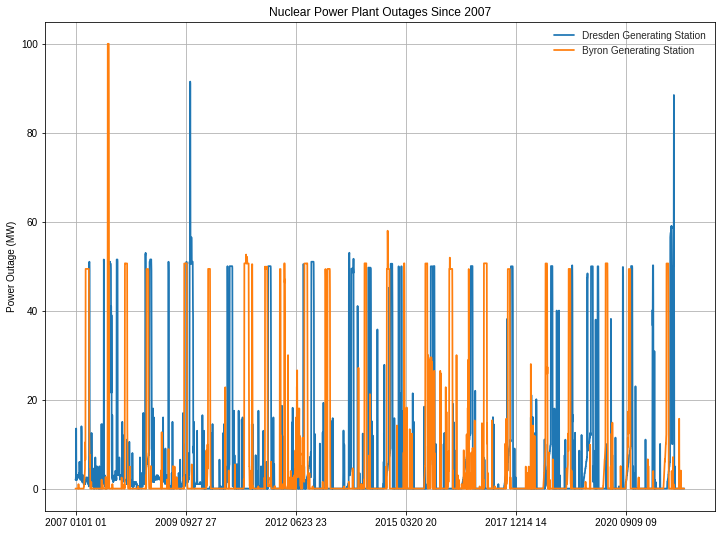

In [14]:
fig, ax = plt.subplots(figsize=(12,9), facecolor='w')
plt.style.use('seaborn')
full[['Dresden Generating Station', 'Byron Generating Station']].plot(ax=ax)
ax.set_title('Nuclear Power Plant Outages Since 2007')
ax.set_ylabel('Power Outage (MW)')

In [15]:
full.to_csv('nuclear_plant_outages_PCT.csv')